Settup time was 1.173616647720337
starting sims
Simulation took 3.4729363918304443


<IPython.core.display.Javascript object>


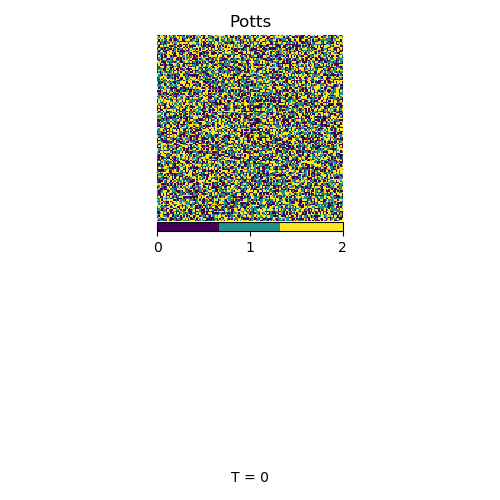

interactive(children=(IntSlider(value=0, description='t', max=99), Output()), _dom_classes=('widget-interact',…

In [3]:
import sys; sys.path.insert(0, '../')
from PlexSim.plexsim.models import *
n = 128
g = nx.grid_graph([n, n])
# g = nx.grid_2d_graph(n, n, periodic = 1)

settings = dict(graph = g,\
                updateType = 'async',\
#                 sampleSize = .25,\
                alpha = 4,\
#                 mu = .2,\
#                 nu = .02,\
#                 kappa = .001,\
#                 beta = .2,\
#                 threshold = .01,\
#                 p = .1,\
               t = 0.5)
rules = nx.Graph()
rules.add_edge(0, 1)
rules.add_edge(1, 2)
# rules.add_edge(2, 0)

ti = time.time()
models = dict(
    Potts = Potts(agentStates = np.arange(3).tolist(),\
                  rules = rules,\
          **settings),\
#     Ising = Ising(\
#           **settings),\
#     Bornholdt = Bornholdt(\
#               **settings),\
#     RBN = RBN(**settings),\
#     SIRS = SIRS(\
#         **settings),\
#    CCA = CCA(\
#         agentStates = np.arange(0,4).tolist(),\
#         **settings),\
#    Percolation = Percolation(\
#                **settings),\
   
)
print(f"Settup time was {time.time() - ti}")
# models.get("Bornholdt").sampleSize = 1
if m := models.get("SIRS"):
    m.states = 0
    m.states[m.sampleNodes(1)[0,0]] = 1
print("starting sims")

T = 100
import time
start = time.time()
results = np.zeros((len(models), T, g.number_of_nodes()))
for idx, m in enumerate(models.values()):
#     m.states = m.agentStates[-1]
    m.reset()
    results[idx] = m.simulate(T)
r = results.mean(-1).flatten()
results = results.reshape(-1, T, n, n)

# print(results.shape)
# results = results[-1, T,:, :, 0]
print(f'Simulation took {time.time() - start}')

import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable as mal
%matplotlib notebook
ts = IntSlider(min = 0, max = T - 1, value = 0)

columns, rows = divmod(len(models), 2)
# fig, ax = plt.subplots()
# ax.plot(r)
# fig.show()
fig, ax = plt.subplots(rows +1, columns +1, figsize = (5,5))
fig.subplots_adjust(wspace = .12, hspace = .0001)
#setup figure/
hs  = []
pad = .01
size = '5%'
for idx, ( (modelName, m), axi) in enumerate(zip(models.items(), ax.flat)):
    div = mal(axi)
    cbr = div.append_axes('bottom', size = size, pad = pad)
#     div = mal(cbr)
#     cbr = div.append_axes('right', size = size, pad = pad)
    AS = m.agentStates
    NS = len(AS) 
    cmap = mpl.colors.LinearSegmentedColormap.from_list(\
          None, plt.cm.viridis(np.linspace(0, 255, NS,\
                                          dtype = int)), NS)
    h = axi.imshow(results[idx, 0], cmap = cmap, vmin = AS[0],\
                  vmax = AS[-1])
    axi.set_title(modelName)
    axi.axis("off")
    tmp = fig.colorbar(h, cax = cbr, ticks = AS,\
                       orientation = 'horizontal')
    if modelName == 'SIRS':
        tmp.set_ticklabels("Sus. Inf. Rec.".split())
    hs.append(h)
mainax = fig.add_subplot(111, frameon = 0,\
                        xticks = [], yticks = [])
[axi.axis('off') for axi in ax.flat[rows * columns:]]
mainax.set_xlabel(f'T = 0')
fig.tight_layout()
@interact(t = ts)
def update(t):
    for idx, h in enumerate(hs):
        h.set_data(results[idx, t])
#         h.autoscale()
    mainax.set_xlabel(f'T = {t}')
    fig.canvas.flush_events()
    fig.canvas.draw()
fig.show()

<IPython.core.display.Javascript object>


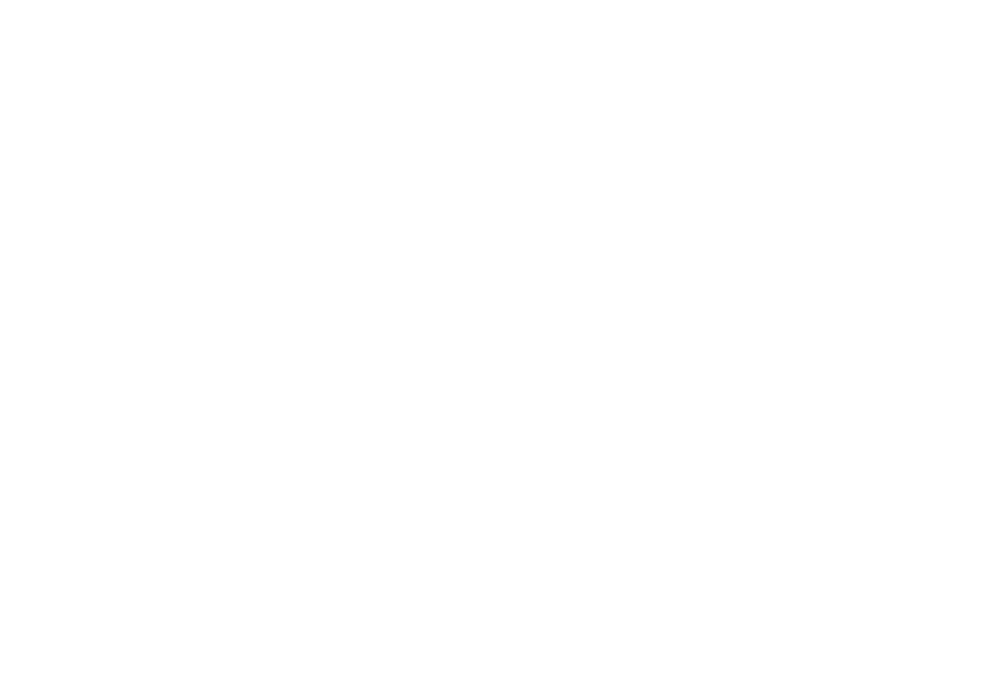

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

<IPython.core.display.Javascript object>


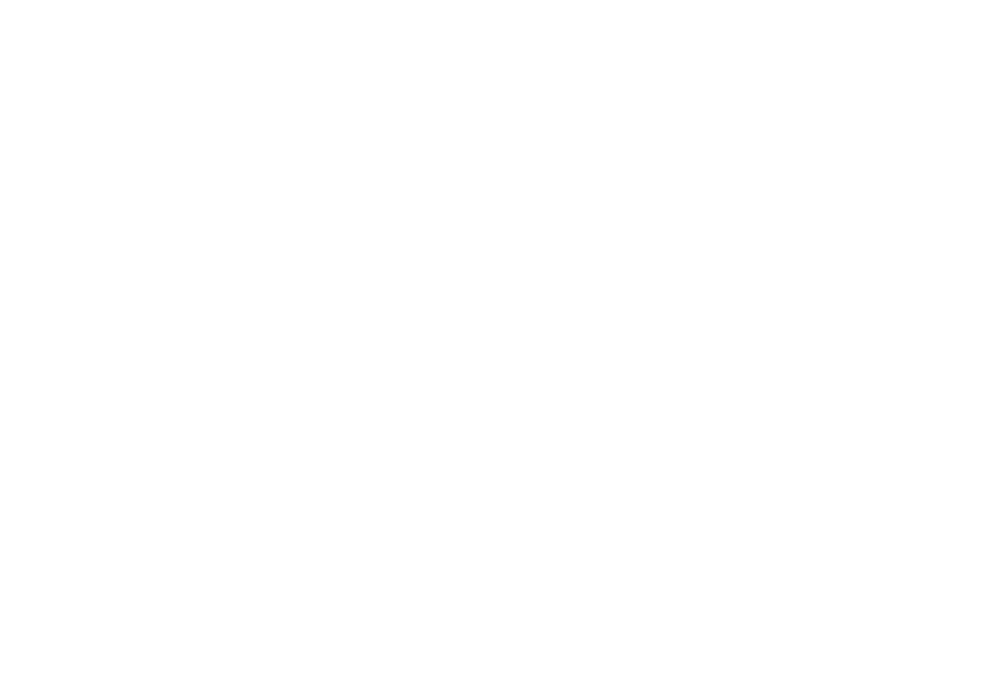

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [114]:
plt.close('all')

def generate_random_3Dgraph(n_nodes, radius, seed=None):
    if seed is not None:
        random.seed(seed)
    
    # Generate a dict of positions
    pos = {i: (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)) for i in range(n_nodes)}
    
    # Create random 3D network
    G = nx.random_geometric_graph(n_nodes, radius, pos=pos)
    return G


def network_plot_3D(G, angle, save=False):
    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')

    # Get number of nodes
    n = G.number_of_nodes()
    # Get the maximum number of edges adjacent to a single node
    edge_max = max([G.degree(i) for i in range(n)])
    # Define color range proportional to number of edges adjacent to a single node
    colors = [plt.cm.plasma(G.degree(i)/edge_max) for i in range(n)] 
    # 3D network plot
    contexts = 'seaborn-poster bmh'.split()
    with plt.style.context(contexts):

        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)

        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for key, value in pos.items():
            xi = value[0]
            yi = value[1]
            zi = value[2]

            # Scatter plot
            ax.scatter(xi, yi, zi, c=colors[key], s=20+20*G.degree(key), edgecolors='k', alpha=0.7)

        # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
        # Those two points are the extrema of the line to be plotted
        for i,j in enumerate(G.edges()):
            x = np.array((pos[j[0]][0], pos[j[1]][0]))
            y = np.array((pos[j[0]][1], pos[j[1]][1]))
            z = np.array((pos[j[0]][2], pos[j[1]][2]))

        # Plot the connecting lines
            ax.plot(x, y, z, color = 'black', alpha = 1)

    # Set the initial view
    ax.view_init(20, angle)
    # Hide the axes
    ax.set_axis_off()
    fig.subplots_adjust(top = 1, bottom = 0,\
                       left = 0, right = 1)
    fig.tight_layout()
    ax.margins(0, 0, 0)
    if save:
         fig.savefig(save +".png", bbox_inches = 'tight',\
                    pad_inches = 0)
         plt.close('all')
    else:
          fig.show()

    return
n=200
G = generate_random_3Dgraph(n_nodes=n, radius=0.25, seed=1)
network_plot_3D(G, 20, save= "top_plot")

g = generate_random_3Dgraph(n_nodes = n, radius = .1,\
                            seed = 1)
network_plot_3D(g, 20, save = 'bottom_plot')